## Desafío Entregable - Maximiliano Ramirez - Evaluando mocdelos de machine learning

#Abstracto

El proyecto busca generar un modelo de interpretación de datos de terremotos, estos entendidos como movimientos sismicos de magnitudes significativas y que podrian provocar daños. La motivación radica en la busqueda de patrones o tendencias que permitan establecer niveles de riesgo geológicos y temporales. Estos niveles de riesgo pueden ayudar a programas de prevención y educación sísmica, e incluso a organismos de emergencia, tanto para actividades preventivas como formativas.

Para esta entrega se evaluarán diversos modelos de machine learning con el objetivo es comparar los diferentes indicadores para cada caso.

### Instalación de librerías (no utilizado en esta entrega)

In [ ]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 22.6 MB 29.9 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357350 sha256=d13822a65b68c2a685a25ebe1575af7cc462533a36b873858ba959c368c45657
  Stored in directory: /tmp/pip-ephem-wheel-cache-0_srh3oi/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=0dd91cc6d51529602d3a6da8486cca98e3bc43c0e8da97b9434334ea036a7bc8
  Stored in directory: /root/.

### Importación de librerias, data aquisition

In [1]:
#Importación de librerias
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import folium
#import pandas_profiling
from sklearn import preprocessing
#from yellowbrick.cluster import KElbowVisualizer
#from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [2]:
#Carga de archivo
url = 'https://drive.google.com/file/d/1o-4Yk2xO4dG0RQ8Ih9nCiqKWSUJB9LhQ/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [3]:
#Información de las columnas de la base de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
df.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


In [7]:
#resumen estadístico de los datos
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


#Feature engineering, para evaluar modelos
Dentro del dataset escogido hay variables numericas, categoricas y de tiempo. La prepración de datos necesaria requiere que en primer lugar extraigamos del dataset los eventos relacionados con terremotos, para luego retirar las instancias que tienen valores nulos en la columna objetivo, la variable categorica objetivo Magnitude Type, la cual tiene pocos valores nulos que podrían ser predecidos por un modelo de machine learning.

In [8]:
# Identificamos los datos distintos en cada columna del tipo Object
for col in df.select_dtypes(include = ["object"]).columns:
    print(f"{col}: {df[col].unique()}")

Date: ['01/02/1965' '01/04/1965' '01/05/1965' ... '12/28/2016' '12/29/2016'
 '12/30/2016']
Time: ['13:44:18' '11:29:49' '18:05:58' ... '12:38:51' '22:30:19' '20:08:28']
Type: ['Earthquake' 'Nuclear Explosion' 'Explosion' 'Rock Burst']
Magnitude Type: ['MW' 'ML' 'MH' 'MS' 'MB' 'MWC' 'MD' nan 'MWB' 'MWW' 'MWR']
ID: ['ISCGEM860706' 'ISCGEM860737' 'ISCGEM860762' ... 'US10007NAF'
 'US10007NL0' 'US10007NTD']
Source: ['ISCGEM' 'ISCGEMSUP' 'OFFICIAL' 'CI' 'US' 'NC' 'GCMT' 'UW' 'ATLAS' 'NN'
 'SE' 'AK' 'PR']
Location Source: ['ISCGEM' 'CI' 'US' 'H' 'U' 'G' 'NC' 'B' 'GCMT' 'AG' 'UW' 'SPE' 'HVO'
 'BRK' 'ATLAS' 'AGS' 'PGC' 'BOU' 'SLC' 'OTT' 'AEI' 'AEIC' 'CASC' 'ISK'
 'ATH' 'THE' 'ROM' 'MDD' 'WEL' 'GUC' 'UNM' 'CSEM' 'RSPR' 'JMA' 'NN' 'CAR'
 'SJA' 'TEH' 'BEO' 'UCR' 'SE' 'TUL' 'TAP' 'THR' 'LIM' 'US_WEL' 'AK' 'PR']
Magnitude Source: ['ISCGEM' 'OFFICIAL' 'CI' 'US' '1020' 'BRK' 'NC' '1000' 'GCMT' '1009' 'UW'
 '1023' 'ATLAS' 'HRV' 'PAR' 'NIED' 'NN' 'SE' 'PGC' 'US_GCMT' 'US_PGC' 'AK'
 'PR' 'GUC']
Status: [

In [9]:
#revisamos la proporcion de tipos dentro de la variable "Type"
Type_counts = df.Type.value_counts(normalize = True)
Type_counts

Earthquake           0.992312
Nuclear Explosion    0.007475
Explosion            0.000171
Rock Burst           0.000043
Name: Type, dtype: float64

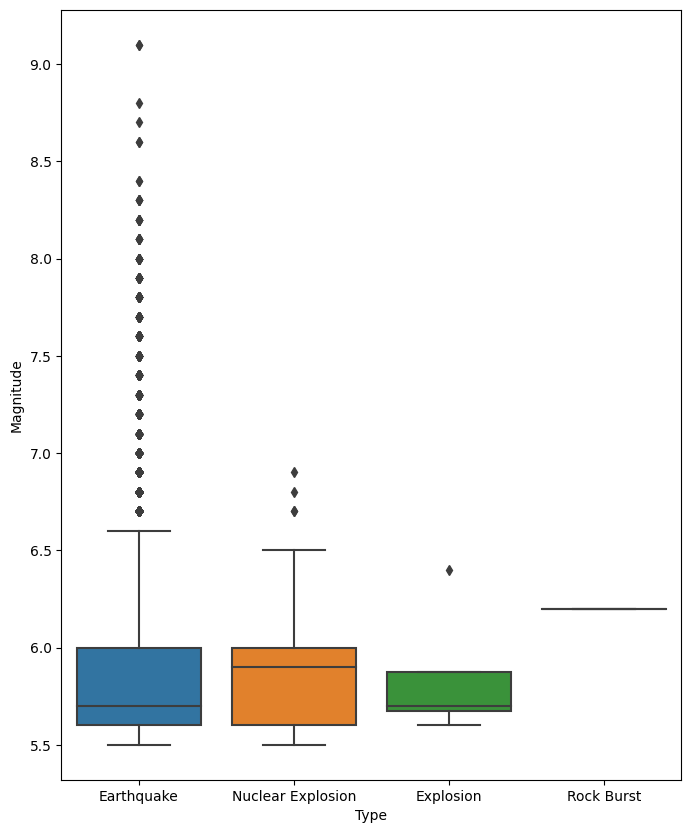

In [10]:
#Empleamos un Boxplot para revisar la distribución de la variable Type en base a las magnitudes
plt.figure(figsize=(8,10))
sns.boxplot(data = df, y = 'Magnitude', x = 'Type')
plt.show()

In [11]:
#Solo nos enfocamos en los terremotos, asi que eliminamos el ruido de los otros tipos de la columna "Type"
df = df[df['Type']=='Earthquake'].copy()
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [12]:
#creamos una copia del dataset limpio
df_2 = df

In [13]:
#Renombramos las columnas
df_2.rename(columns = {'Depth Error':'q_dep_e','Depth Seismic Stations':'q_dep_s',
                     'Magnitude Type':'Mag_t','Mangnitude Error':'q_mag_e',
                     'Magnitude Seismic Stations':'q_mag_s',
                     'Azimuthal Gap':'q_az_g','Horizontal Distance':'q_hor_d',
                     'Horizontal Error':'q_hor_e','Root Mean Square':'q_rms',
                     'Location Source':'Loc_s','Magnitude Source':'Mag_source'}
          , inplace = True)

In [14]:
#Revisión de datos incosistentes en la variable de interés "Mag_t"
Magnitude_type_nan = df_2[df_2['Mag_t'].isnull()]
Magnitude_type_nan

,Date,Time,Latitude,Longitude,Type,Depth,q_dep_e,q_dep_s,Magnitude,Mag_t,...,q_mag_s,q_az_g,q_hor_d,q_hor_e,q_rms,ID,Source,Loc_s,Mag_source,Status
6703,08/24/1983,13:36:00,40.3732,-124.9227,Earthquake,11.93,NaN,NaN,5.70,NaN,...,NaN,NaN,NaN,NaN,NaN,ATLAS19830824133600,ATLAS,ATLAS,ATLAS,Automatic
7294,11/23/1984,18:08:00,37.4600,-118.5900,Earthquake,9.00,NaN,NaN,5.82,NaN,...,NaN,NaN,NaN,NaN,NaN,ATLAS19841123180800,ATLAS,ATLAS,ATLAS,Automatic
7919,03/31/1986,11:55:00,37.4788,-121.6858,Earthquake,9.17,NaN,NaN,5.60,NaN,...,NaN,NaN,NaN,NaN,NaN,ATLAS19860331115500,ATLAS,ATLAS,ATLAS,Automatic


In [15]:
#se eliminan las filas del modelo que tienen el valor NaN en Mag_t
df_2 = df_2.dropna(subset=["Mag_t"])
df_2.isnull().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Type                   0
Depth                  0
q_dep_e            18780
q_dep_s            16145
Magnitude              0
Mag_t                  0
Magnitude Error    22914
q_mag_s            20769
q_az_g             15943
q_hor_d            21634
q_hor_e            22085
q_rms               5982
ID                     0
Source                 0
Loc_s                  0
Mag_source             0
Status                 0
dtype: int64

([<matplotlib.patches.Wedge at 0x7abd73d04fa0>,
 [Text(0.5527033714745364, 0.9510620290815319, 'MW'),
  Text(-1.0552210036173537, 0.3106583871792051, 'MWC'),
  Text(-0.6251631498229219, -0.905080679333883, 'MB'),
  Text(0.2336335070389838, -1.0749024999453045, 'MWB'),
  Text(0.8002301064674736, -0.7547395422945959, 'MWW'),
  Text(1.0636553021636346, -0.28042360488943757, 'MS'),
  Text(1.0998056344374023, -0.02067768023118192, 'ML'),
  Text(1.0999768214910146, -0.007140881074830134, 'MWR'),
  Text(1.0999974245651472, -0.0023803256170746166, 'MD'),
  Text(1.0999997484806272, -0.0007438699867632481, 'MH')])

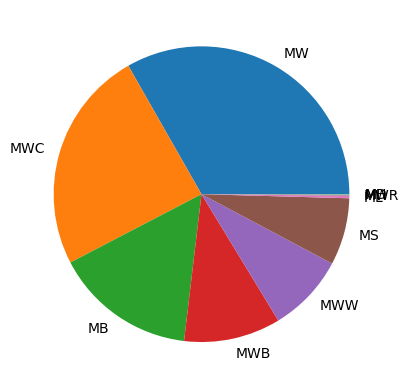

In [16]:
#graficamos la distribución de la variable de interes "Mag_t"
fig, ax = plt.subplots()
s = df_2['Mag_t'].value_counts()
plt.pie(s,labels = s.index)

In [18]:
#Separo las variables categoricas de las numerica, se consideran cuatro de estas ultimas dado que maximiza los resultados de los modelos predictivos
X_cat = df_2[['Status', 'Loc_s', 'Mag_source', 'Source','Type']]
X_num = df_2[['Magnitude','Depth','Latitude','Longitude']]

# Encoding
Dadas las variables categoricas, como "Mag_t", "Type", "Source", "Mag_source", "Loc_s", y "status". Y excluyendo a "Mag_t" por ser la variable de interes, se selecciona el metodo One Hot Ecoding para reducir la dimensionalidad.

In [24]:
#Se define la variable "y"
y = df_2['Mag_t']

In [19]:
#Importamos en encoder, y hacemos Fit con el modelo
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X_cat = ohe.fit_transform(X_cat).toarray()

In [20]:
#configuramos el dataframe y vemos el resultado
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23224,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23225,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23226,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23227,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Se escálan las variables numéricas.

In [21]:
#Se importa y define el objeto
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
#Se hace fit en el modelo de regresión
X_num = scaler.fit_transform(X_num)
X_num = pd.DataFrame(X_num)
X_num

,0,1,2,3
0,0.138889,0.189274,0.590649,0.904493
1,0.083333,0.115675,0.484060,0.853759
2,0.194444,0.030096,0.346451,0.016736
3,0.083333,0.022964,0.110396,0.434562
4,0.083333,0.022964,0.545838,0.851190
...,...,...,...,...
23224,0.027778,0.019113,0.708046,0.169733
23225,0.000000,0.014121,0.707960,0.169728
23226,0.111111,0.015832,0.699009,0.890077
23227,0.222222,0.114249,0.417277,0.829625


In [23]:
#Se concatenan ambas tablas, de variables categoricas y numericas
X_all = pd.concat([X_cat, X_num], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,0,1,2,3
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.138889,0.189274,0.590649,0.904493
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.083333,0.115675,0.484060,0.853759
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.194444,0.030096,0.346451,0.016736
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.083333,0.022964,0.110396,0.434562
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.083333,0.022964,0.545838,0.851190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23224,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.027778,0.019113,0.708046,0.169733
23225,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.014121,0.707960,0.169728
23226,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.111111,0.015832,0.699009,0.890077
23227,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.222222,0.114249,0.417277,0.829625


#Aplicación de modelos y resultados
Se proces a aplicar cada uno de los modelos a evaluar, presentando los indicadores respectivos en cada caso.

In [27]:
#Se realiza la división en conjunto de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.30, stratify = y)

## 1) Regresión logística

In [28]:
#importación y "fit"
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
#Test predictivo
y_pred_1 = model.predict(X_test)

In [30]:
#Creación del reporte
cr_1 = classification_report(y_test, y_pred_1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#Resumen de indicadores del modelo
print(cr_1)

              precision    recall  f1-score   support

          MB       0.47      0.87      0.61      1078
          MD       1.00      1.00      1.00         2
          MH       0.00      0.00      0.00         1
          ML       0.46      0.65      0.54        20
          MS       0.21      0.11      0.14       511
          MW       0.69      0.99      0.81      2317
         MWB       0.30      0.23      0.26       737
         MWC       1.00      0.29      0.45      1700
         MWR       1.00      0.38      0.55         8
         MWW       0.27      0.11      0.16       595

    accuracy                           0.58      6969
   macro avg       0.54      0.46      0.45      6969
weighted avg       0.62      0.58      0.53      6969



In [49]:
#matriz de confusión
confusion_matrix(y_test, y_pred_1)

array([[ 939,    0,    0,    0,    9,    0,  115,    0,    0,   15],
       [   0,    2,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    0,    0],
       [   2,    0,    0,   13,    3,    2,    0,    0,    0,    0],
       [ 269,    0,    0,    1,   56,    0,  104,    0,    0,   81],
       [   0,    0,    0,   13,    0, 2303,    0,    1,    0,    0],
       [ 425,    0,    0,    0,   77,    0,  170,    0,    0,   65],
       [  66,    0,    0,    0,   29, 1043,   43,  496,    0,   23],
       [   5,    0,    0,    0,    0,    0,    0,    0,    3,    0],
       [ 299,    0,    0,    0,   95,    0,  133,    0,    0,   68]])

## 2) Árbol de desición

In [33]:
#importación y "fit"
from sklearn.tree import DecisionTreeClassifier
arbol_de_decision = DecisionTreeClassifier(max_depth=6, random_state = 42)
arbol_de_decision.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [34]:
#test predictivo
y_pred_2 = arbol_de_decision.predict(X_test)

In [35]:
#Creación del reporte
cr_2 = classification_report(y_test, y_pred_2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
#Resumen de indicadores del modelo
print(cr_2)

              precision    recall  f1-score   support

          MB       0.52      0.79      0.63      1078
          MD       0.00      0.00      0.00         2
          MH       0.00      0.00      0.00         1
          ML       0.56      0.50      0.53        20
          MS       0.56      0.29      0.38       511
          MW       0.79      0.81      0.80      2317
         MWB       0.38      0.28      0.32       737
         MWC       0.71      0.62      0.66      1700
         MWR       1.00      0.25      0.40         8
         MWW       0.36      0.38      0.37       595

    accuracy                           0.63      6969
   macro avg       0.49      0.39      0.41      6969
weighted avg       0.63      0.63      0.62      6969



In [50]:
#matriz de confusión
confusion_matrix(y_test, y_pred_2)

array([[ 857,    0,    0,    0,   51,    0,   87,    0,    0,   83],
       [   0,    0,    0,    0,    0,    2,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    0,    0,    0,    0],
       [   0,    1,    0,   10,    3,    6,    0,    0,    0,    0],
       [ 226,    0,    0,    0,  148,    1,   55,    0,    0,   81],
       [   0,    0,    0,    8,    0, 1876,    0,  433,    0,    0],
       [ 311,    0,    0,    0,   41,    0,  207,    0,    0,  178],
       [  48,    0,    0,    0,    6,  480,   51, 1059,    0,   56],
       [   2,    0,    0,    0,    0,    1,    3,    0,    2,    0],
       [ 214,    0,    0,    0,   15,    1,  137,    0,    0,  228]])

## 3) Random forest
Este modelo es finalmente el que posee mejores indicadores, como F1 Score, y precisión.

In [39]:
#importación y "fit"
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=100,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=42)

In [40]:
#test predictivo
y_pred_3 = model.predict(X_test)

In [41]:
#Creación del reporte
cr_3 = classification_report(y_test, y_pred_3)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
#Resumen de indicadores del modelo
print(cr_3)

              precision    recall  f1-score   support

          MB       0.57      0.69      0.62      1078
          MD       1.00      1.00      1.00         2
          MH       0.00      0.00      0.00         1
          ML       0.71      0.60      0.65        20
          MS       0.47      0.44      0.46       511
          MW       0.78      0.83      0.80      2317
         MWB       0.38      0.37      0.38       737
         MWC       0.70      0.60      0.64      1700
         MWR       1.00      0.25      0.40         8
         MWW       0.39      0.35      0.37       595

    accuracy                           0.63      6969
   macro avg       0.60      0.51      0.53      6969
weighted avg       0.63      0.63      0.63      6969



In [48]:
#matriz de confusión
confusion_matrix(y_test, y_pred_3)

array([[ 744,    0,    0,    0,  104,    0,  142,    5,    0,   83],
       [   0,    2,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    0,    0],
       [   1,    0,    0,   12,    2,    4,    0,    1,    0,    0],
       [ 154,    0,    0,    1,  226,    0,   72,    8,    0,   50],
       [   0,    0,    0,    3,    0, 1916,    0,  398,    0,    0],
       [ 224,    0,    0,    0,   79,    0,  274,   16,    0,  144],
       [  32,    0,    0,    0,   21,  530,   57, 1015,    0,   45],
       [   5,    0,    0,    0,    0,    0,    0,    1,    2,    0],
       [ 151,    0,    0,    0,   50,    0,  169,   16,    0,  209]])

## 4) Máquinas de vectores de soporte (SVM)

In [43]:
# importación y "fit"
from sklearn.svm import SVC
modelo = SVC(C = 100, kernel = 'linear', random_state=42)
modelo.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=42)

In [44]:
#test predictivo
y_pred_4 = modelo.predict(X_test)

In [45]:
#Creación del reporte
cr_4 = classification_report(y_test, y_pred_4)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
#Resumen de indicadores del modelo de regresión logistica
print(cr_4)

              precision    recall  f1-score   support

          MB       0.46      0.88      0.60      1078
          MD       1.00      1.00      1.00         2
          MH       0.00      0.00      0.00         1
          ML       0.58      0.55      0.56        20
          MS       0.00      0.00      0.00       511
          MW       0.69      1.00      0.81      2317
         MWB       0.29      0.40      0.34       737
         MWC       1.00      0.29      0.45      1700
         MWR       1.00      0.38      0.55         8
         MWW       0.37      0.02      0.03       595

    accuracy                           0.58      6969
   macro avg       0.54      0.45      0.43      6969
weighted avg       0.61      0.58      0.51      6969



In [51]:
#matriz de confusión
confusion_matrix(y_test, y_pred_4)

array([[ 948,    0,    0,    0,    0,    0,  125,    0,    0,    5],
       [   0,    2,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    0,    0,    0,    0],
       [   5,    0,    0,   11,    0,    4,    0,    0,    0,    0],
       [ 285,    0,    0,    1,    0,    0,  224,    0,    0,    1],
       [   0,    0,    0,    7,    0, 2309,    0,    1,    0,    0],
       [ 437,    0,    0,    0,    0,    0,  292,    0,    0,    8],
       [  69,    0,    0,    0,    0, 1043,   89,  496,    0,    3],
       [   5,    0,    0,    0,    0,    0,    0,    0,    3,    0],
       [ 315,    0,    0,    0,    0,    0,  270,    0,    0,   10]])